In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

import librosa
import librosa.display

import IPython

from IPython.display import Audio

from sklearn.model_selection import train_test_split

In [4]:
meta_data = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [36]:
meta_data['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

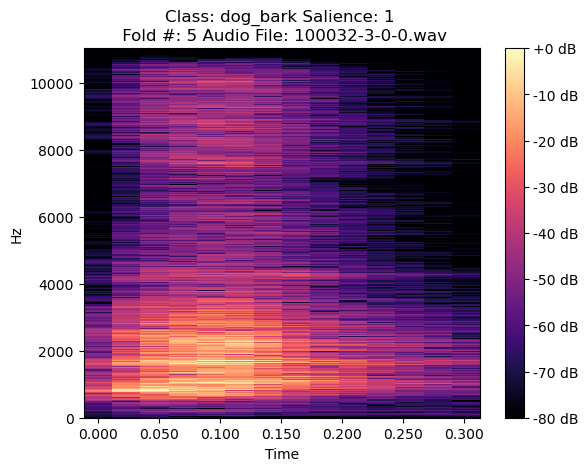

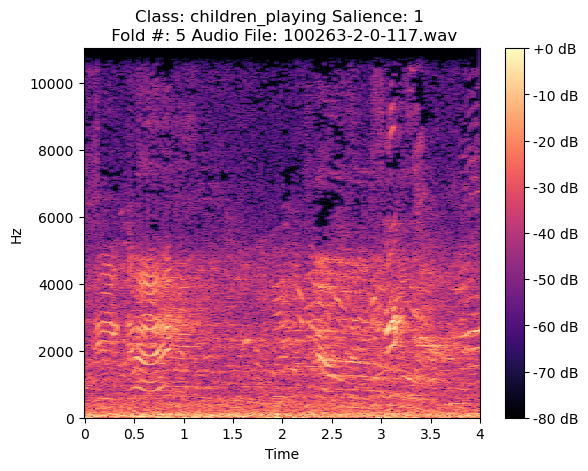

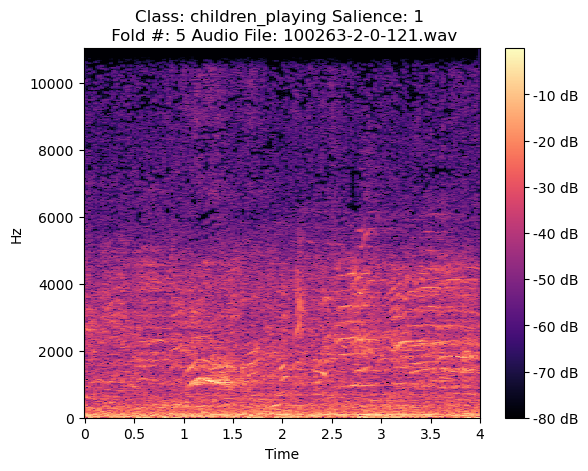

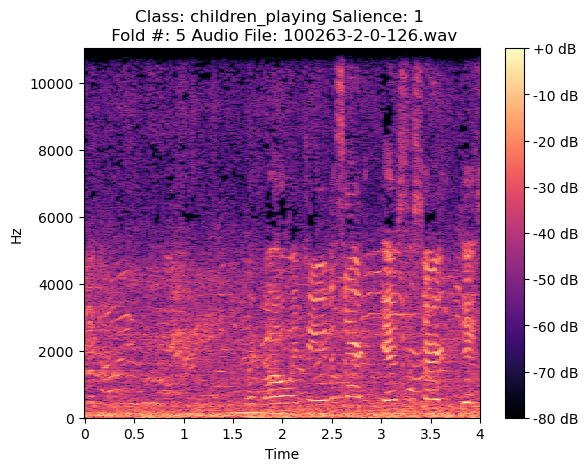

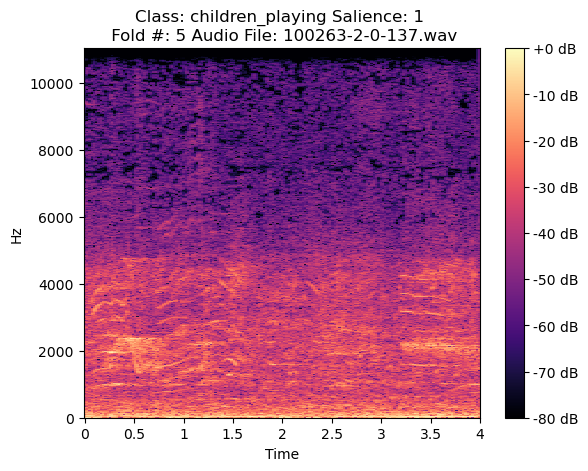

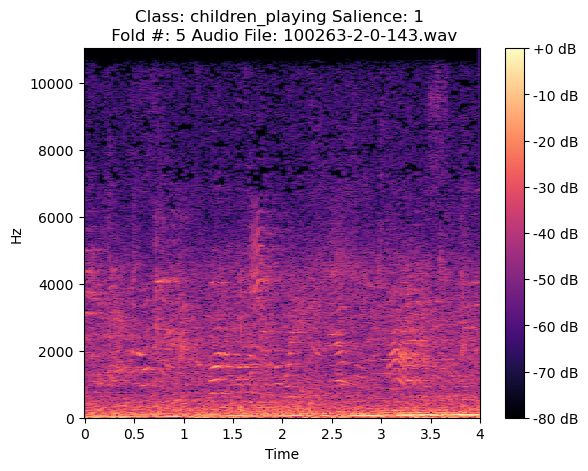

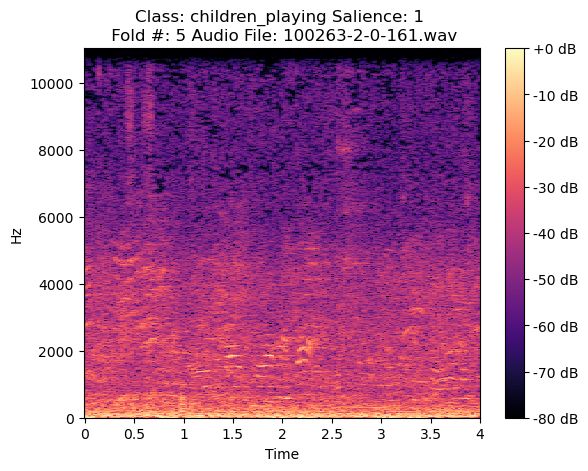

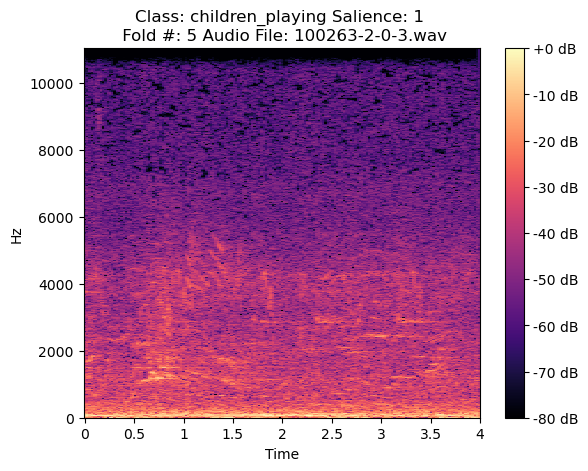

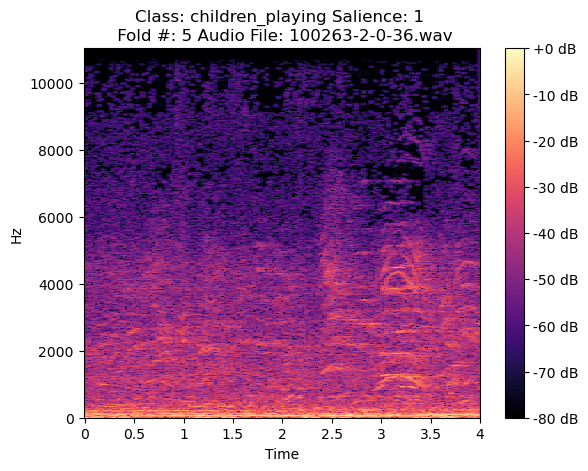

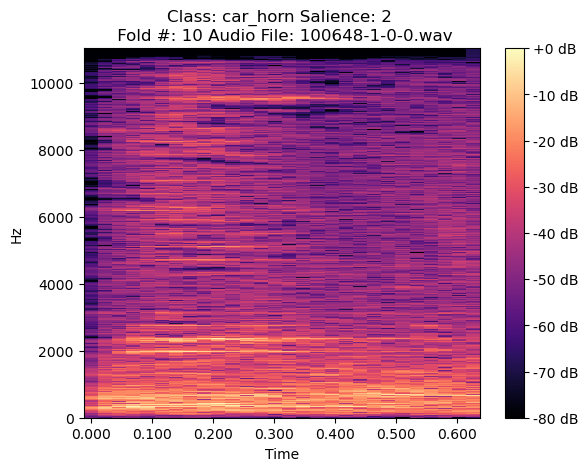

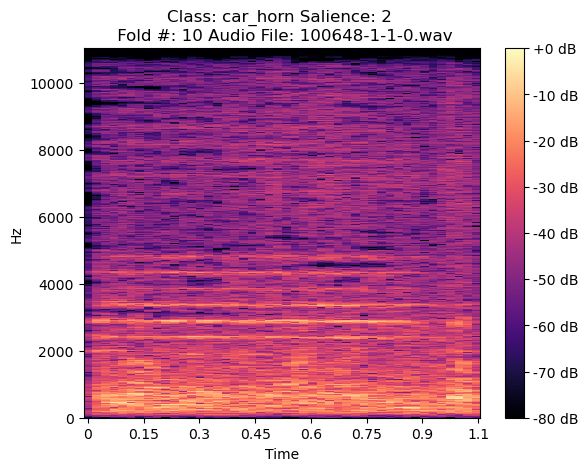

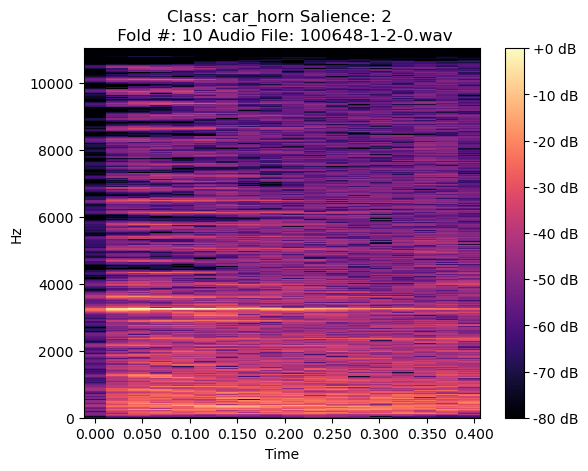

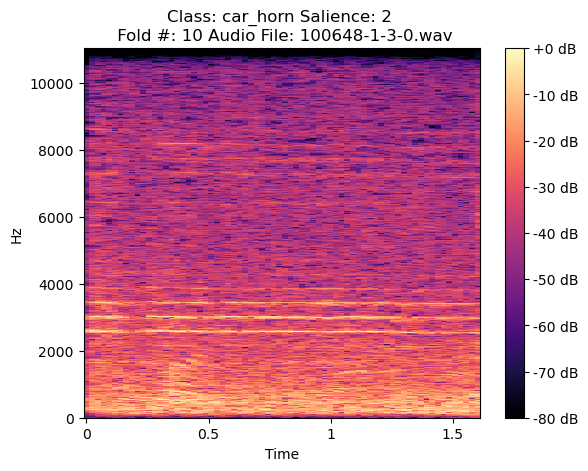

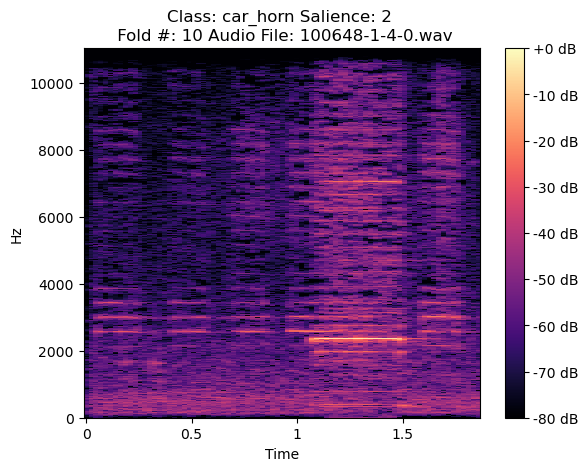

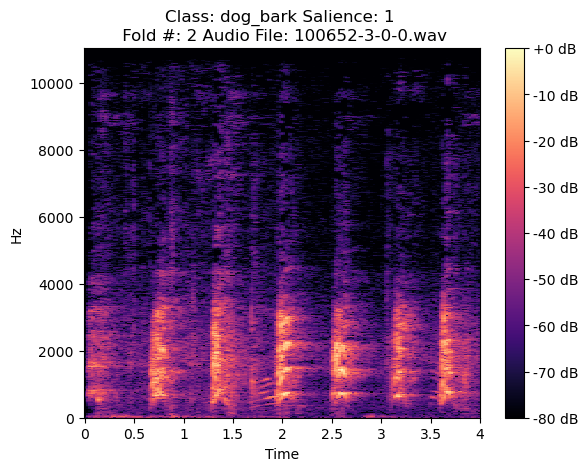

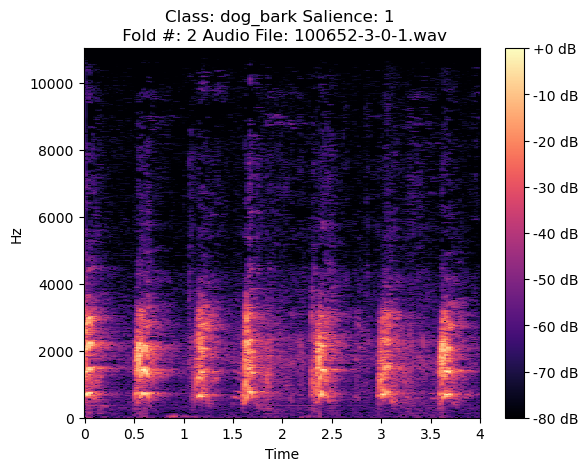

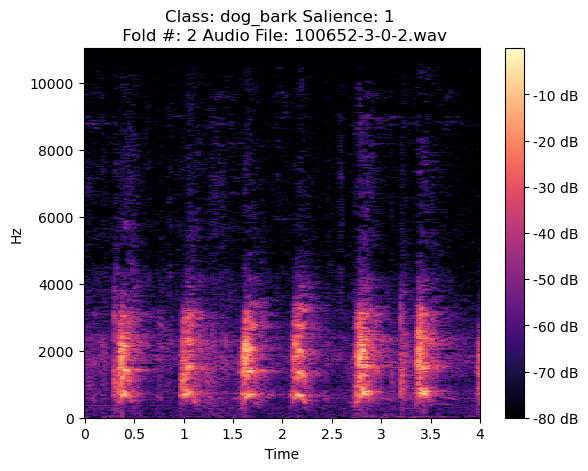

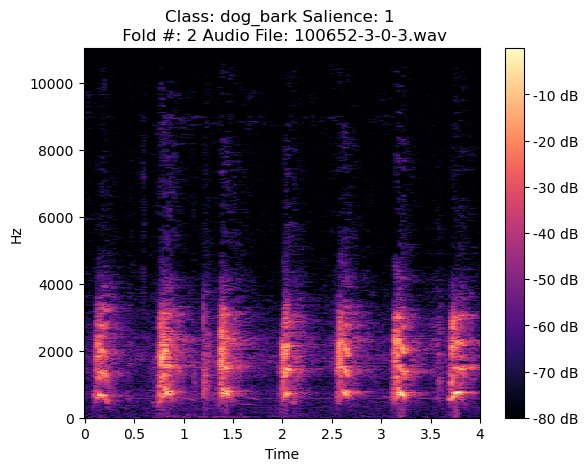

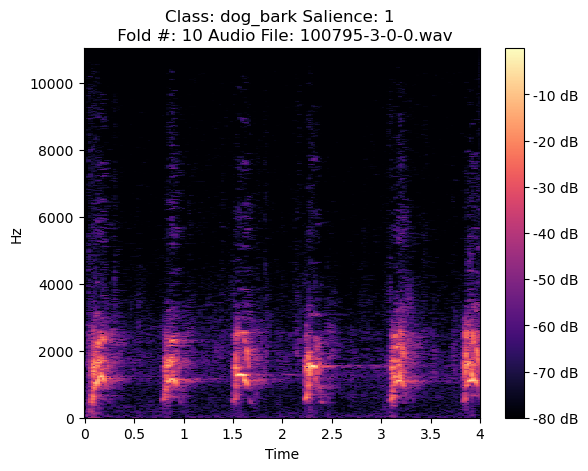

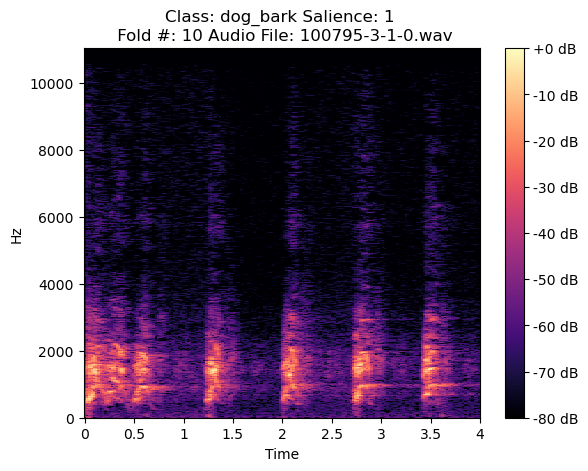

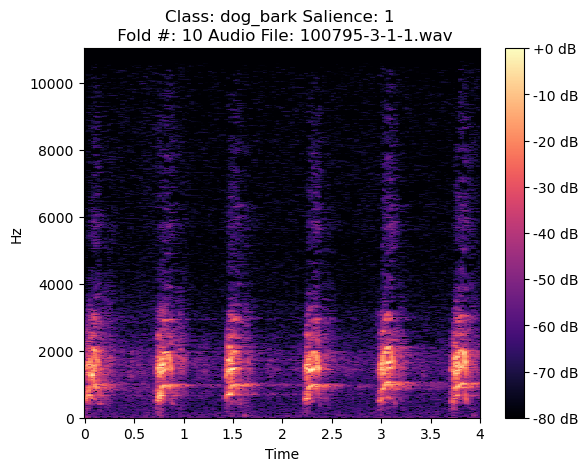

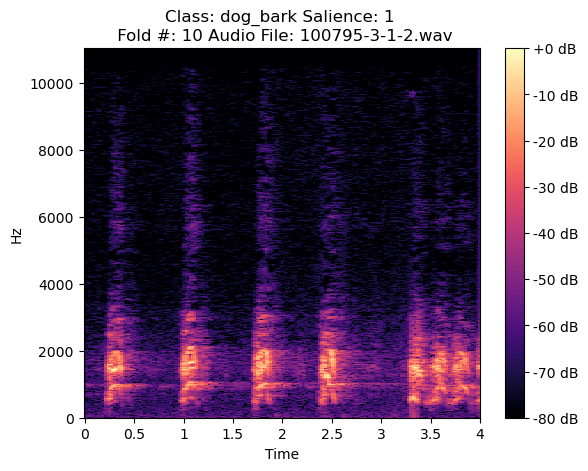

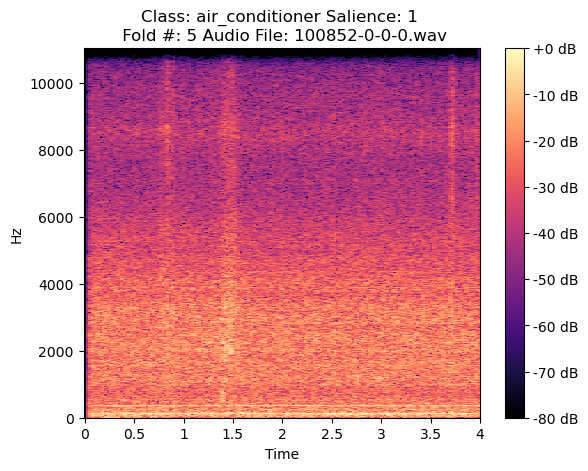

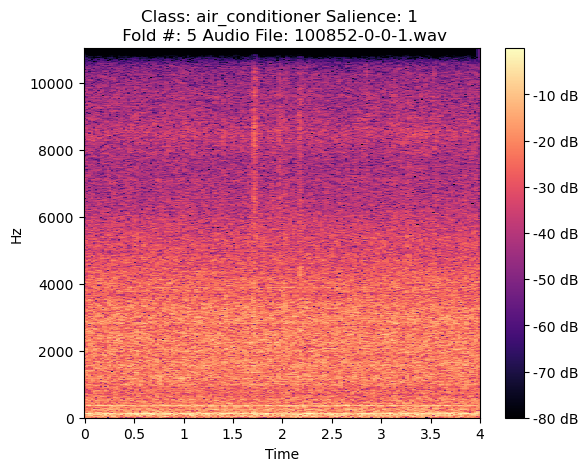

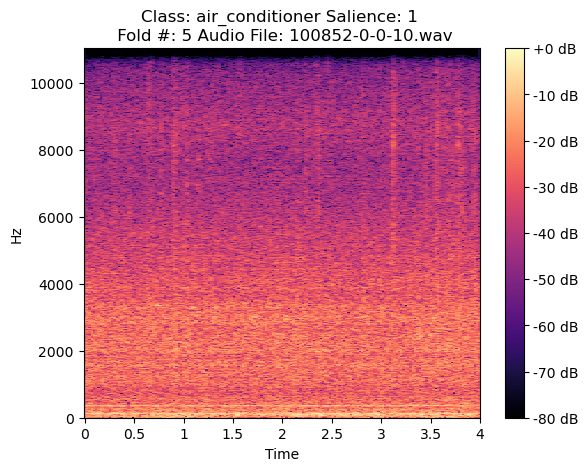

In [19]:
for idx, row in meta_data[:25].iterrows():
    
    y, sr = librosa.load('UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name']))

    fig, ax = plt.subplots()
    
    D = librosa.stft(y)  # Short Time Fourier Transform (STFT) of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)    
    
    img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title = 'Class: {} Salience: {} \n Fold #: {} Audio File: {}'.format(row['class'], row['salience'], row['fold'], row['slice_file_name']))
    fig.colorbar(img, ax=ax, format="%+2.f dB")

    
    plt.show()

In [ ]:
y, sr = librosa.load('UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name']))

fig, ax = plt.subplots()


ValueError: Number of rows must be a positive integer, not False

<Figure size 640x480 with 0 Axes>

In [20]:
y, sr = librosa.load('/Users/eitan/Documents/Flatiron/Capstone/UrbanSound8K/audio/fold8/171464-3-2-0.wav')

In [28]:
meta_data[meta_data['slice_file_name'] == '171464-3-2-0.wav']

slice_file_name    fsID      start        end  salience  fold  classID  \
3509  171464-3-2-0.wav  171464  11.705992  13.111154         1     8        3   

         class  
3509  dog_bark

In [34]:
meta_data[(meta_data['class'] == 'dog_bark') &  (meta_data['salience'] == 1)]

slice_file_name    fsID     start       end  salience  fold  classID  \
0     100032-3-0-0.wav  100032  0.000000  0.317551         1     5        3   
14    100652-3-0-0.wav  100652  0.000000  4.000000         1     2        3   
15    100652-3-0-1.wav  100652  0.500000  4.500000         1     2        3   
16    100652-3-0-2.wav  100652  1.000000  5.000000         1     2        3   
17    100652-3-0-3.wav  100652  1.500000  5.500000         1     2        3   
...                ...     ...       ...       ...       ...   ...      ...   
8594   97193-3-0-4.wav   97193  2.000000  6.000000         1     2        3   
8595   97193-3-0-6.wav   97193  3.000000  7.000000         1     2        3   
8611   97392-3-0-0.wav   97392  0.000000  2.773946         1     6        3   
8618   97756-3-0-0.wav   97756  0.141727  1.290466         1    10        3   
8681   99185-3-0-0.wav   99185  0.341411  0.950911         1     5        3   

         class  
0     dog_bark  
14    dog_bark  
15    dog_bark  
16    dog_bark  
17    dog_bark  
...        ...  
8594  dog_bark  
8595  dog_bark  
8611  dog_bark  
8618  dog_bark  
8681  dog_bark  

[645 rows x 8 columns]

In [30]:
meta_data[(meta_data['class'] == 'dog_bark') &  (meta_data['salience'] == 2)]

slice_file_name    fsID      start        end  salience  fold  \
53     101281-3-0-0.wav  101281   0.341333   4.341333         2     6   
54    101281-3-0-14.wav  101281   7.341333  11.341333         2     6   
55     101281-3-0-5.wav  101281   2.841333   6.841333         2     6   
100    102102-3-0-0.wav  102102   1.573952   4.673824         2     4   
101    102103-3-0-0.wav  102103   1.976030   2.508892         2    10   
...                 ...     ...        ...        ...       ...   ...   
8548    95536-3-0-5.wav   95536   2.500000   6.500000         2     6   
8549   95549-3-0-14.wav   95549  18.181689  22.181689         2     8   
8550   95549-3-0-20.wav   95549  21.181689  25.181689         2     8   
8551    95549-3-0-6.wav   95549  14.181689  18.181689         2     8   
8552    95549-3-0-7.wav   95549  14.681689  18.681689         2     8   

      classID     class  
53          3  dog_bark  
54          3  dog_bark  
55          3  dog_bark  
100         3  dog_bark  
101         3  dog_bark  
...       ...       ...  
8548        3  dog_bark  
8549        3  dog_bark  
8550        3  dog_bark  
8551        3  dog_bark  
8552        3  dog_bark  

[355 rows x 8 columns]

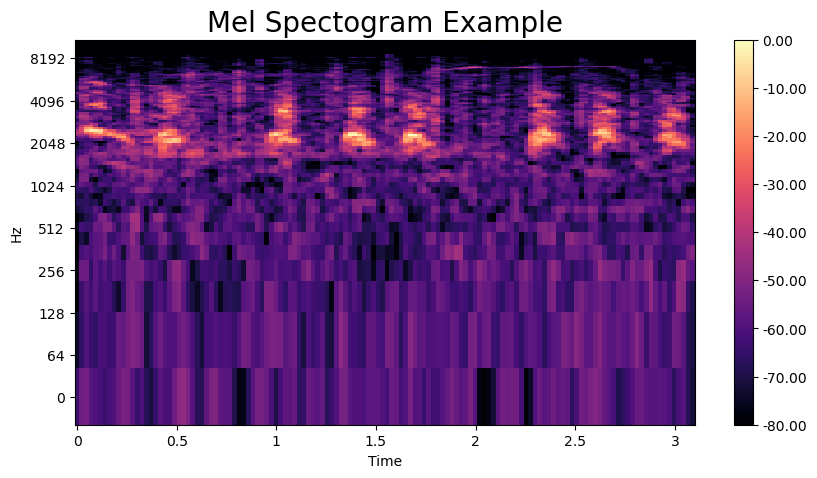

In [33]:
y, sr = librosa.load('/Users/eitan/Documents/Flatiron/Capstone/UrbanSound8K/audio/fold4/102102-3-0-0.wav')
S = librosa.feature.melspectrogram(y=y, sr=sr,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

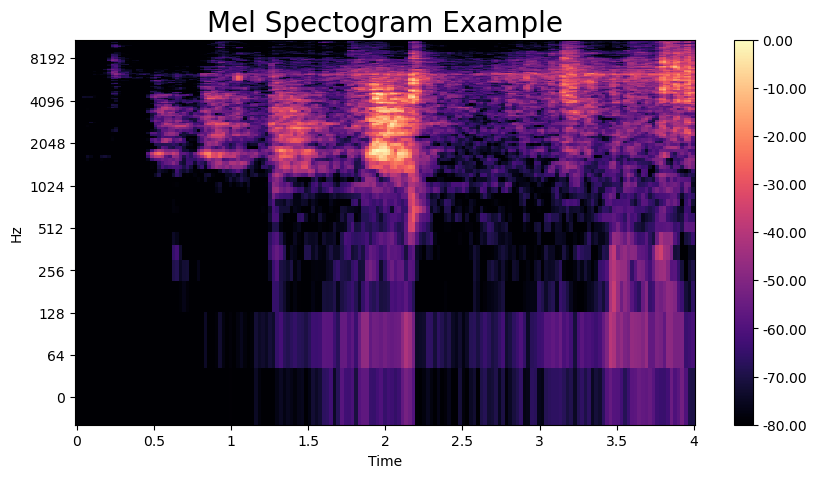

In [32]:
y, sr = librosa.load('/Users/eitan/Documents/Flatiron/Capstone/UrbanSound8K/audio/fold6/101281-3-0-0.wav')

S = librosa.feature.melspectrogram(y=y, sr=sr,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

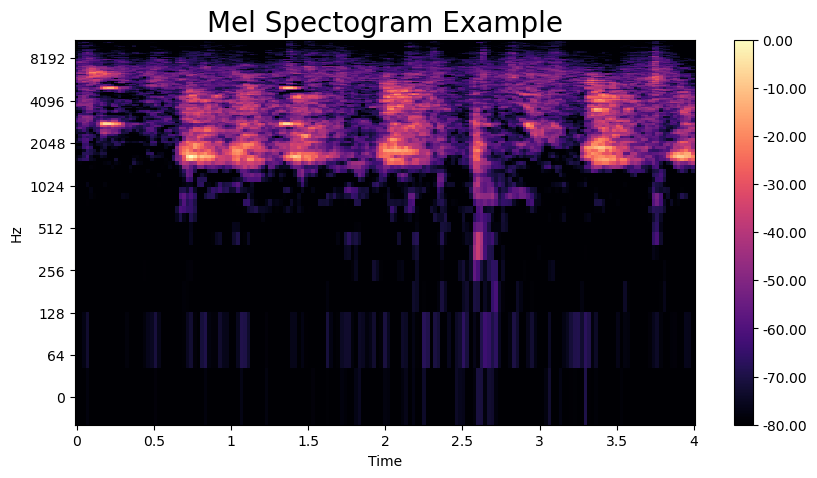

In [35]:
y, sr = librosa.load('/Users/eitan/Documents/Flatiron/Capstone/UrbanSound8K/audio/fold6/101281-3-0-14.wav')

S = librosa.feature.melspectrogram(y=y, sr=sr,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

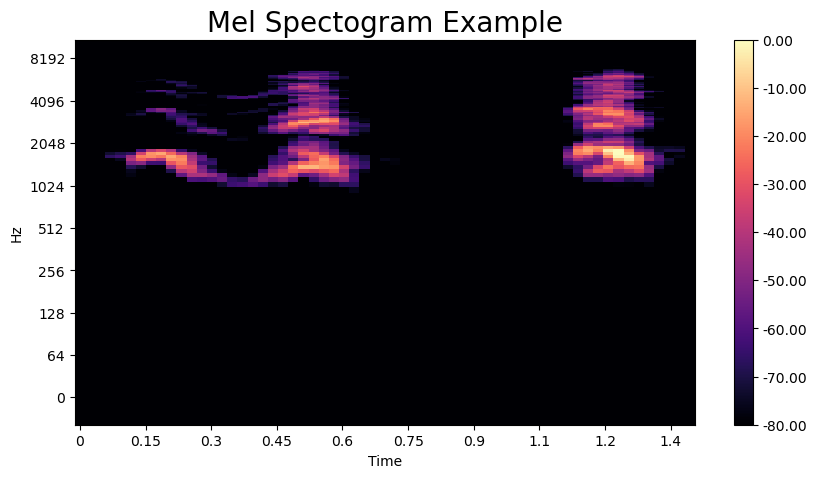

In [21]:
y, sr = librosa.load('/Users/eitan/Documents/Flatiron/Capstone/UrbanSound8K/audio/fold8/171464-3-2-0.wav')

S = librosa.feature.melspectrogram(y=y, sr=sr,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [37]:
meta_data[(meta_data['class'] == 'street_music') &  (meta_data['salience'] == 1)]

slice_file_name    fsID  start   end  salience  fold  classID  \
94    101848-9-0-0.wav  101848    0.0   4.0         1     7        9   
95    101848-9-0-1.wav  101848    0.5   4.5         1     7        9   
96    101848-9-0-2.wav  101848    1.0   5.0         1     7        9   
97    101848-9-0-3.wav  101848    1.5   5.5         1     7        9   
98    101848-9-0-8.wav  101848    4.0   8.0         1     7        9   
...                ...     ...    ...   ...       ...   ...      ...   
8718  99710-9-0-12.wav   99710    6.0  10.0         1     6        9   
8719  99710-9-0-16.wav   99710    8.0  12.0         1     6        9   
8720   99710-9-0-2.wav   99710    1.0   5.0         1     6        9   
8721   99710-9-0-5.wav   99710    2.5   6.5         1     6        9   
8722   99710-9-0-6.wav   99710    3.0   7.0         1     6        9   

             class  
94    street_music  
95    street_music  
96    street_music  
97    street_music  
98    street_music  
...            ...  
8718  street_music  
8719  street_music  
8720  street_music  
8721  street_music  
8722  street_music  

[625 rows x 8 columns]

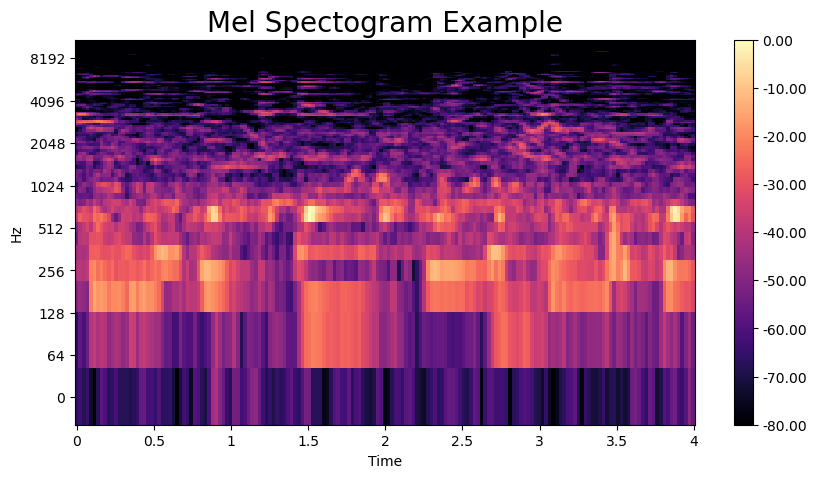

In [38]:
y, sr = librosa.load('/Users/eitan/Documents/Flatiron/Capstone/UrbanSound8K/audio/fold7/101848-9-0-0.wav')

S = librosa.feature.melspectrogram(y=y, sr=sr,)

S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

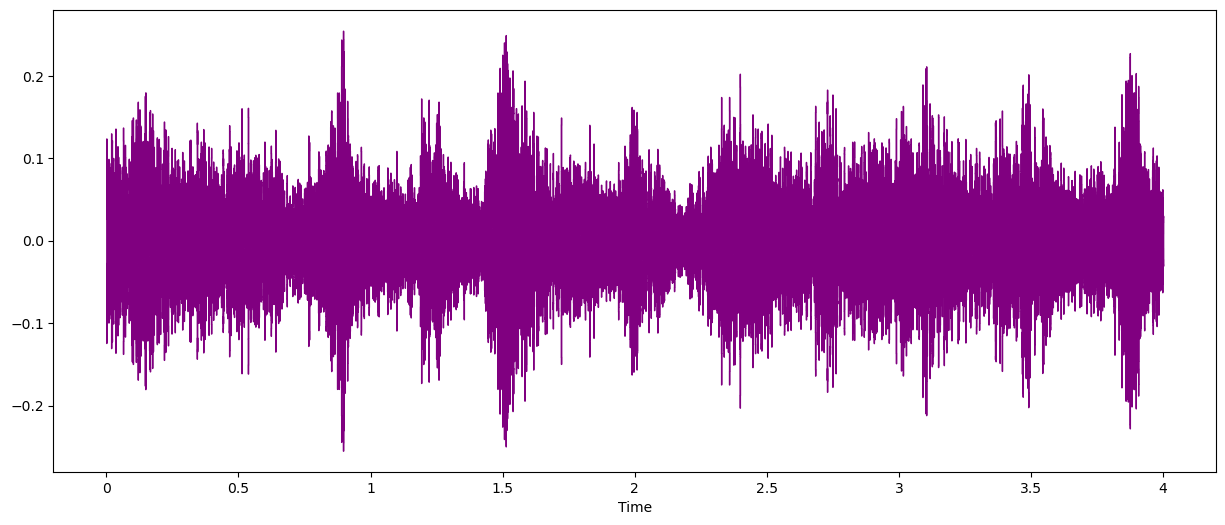

In [47]:
y, sr = librosa.load('/Users/eitan/Documents/Flatiron/Capstone/UrbanSound8K/audio/fold7/101848-9-0-0.wav')

plt.figure(figsize = (15,6))
librosa.display.waveshow(y, sr = sr, color = 'purple');

In [39]:
Audio('UrbanSound8K/audio/fold7/101848-9-0-0.wav')

In [52]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))

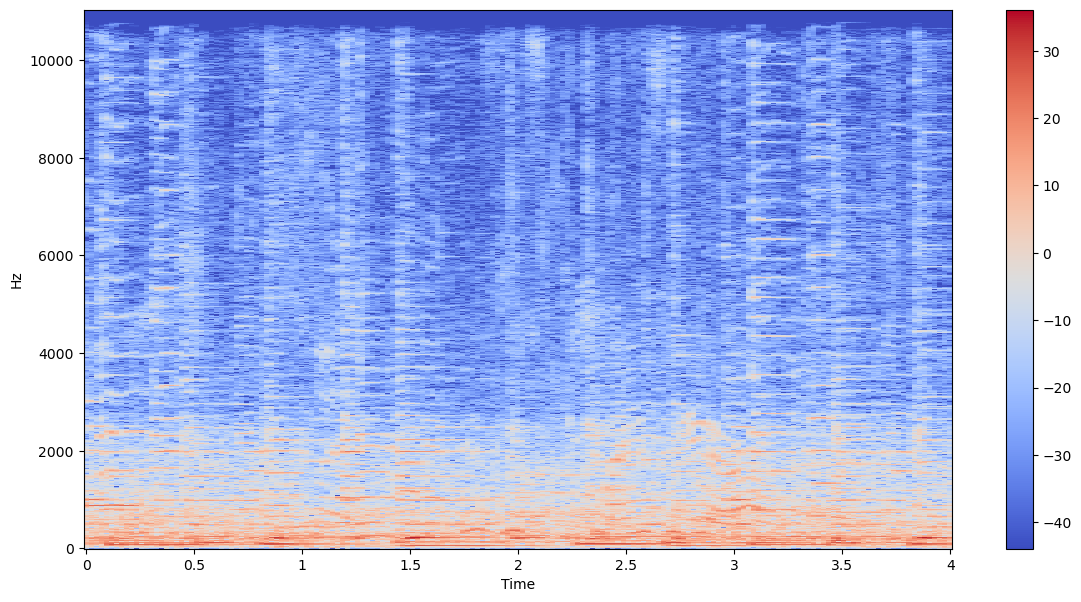

In [62]:
plt.figure(figsize = (14,7))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis = 'hz')
plt.colorbar();

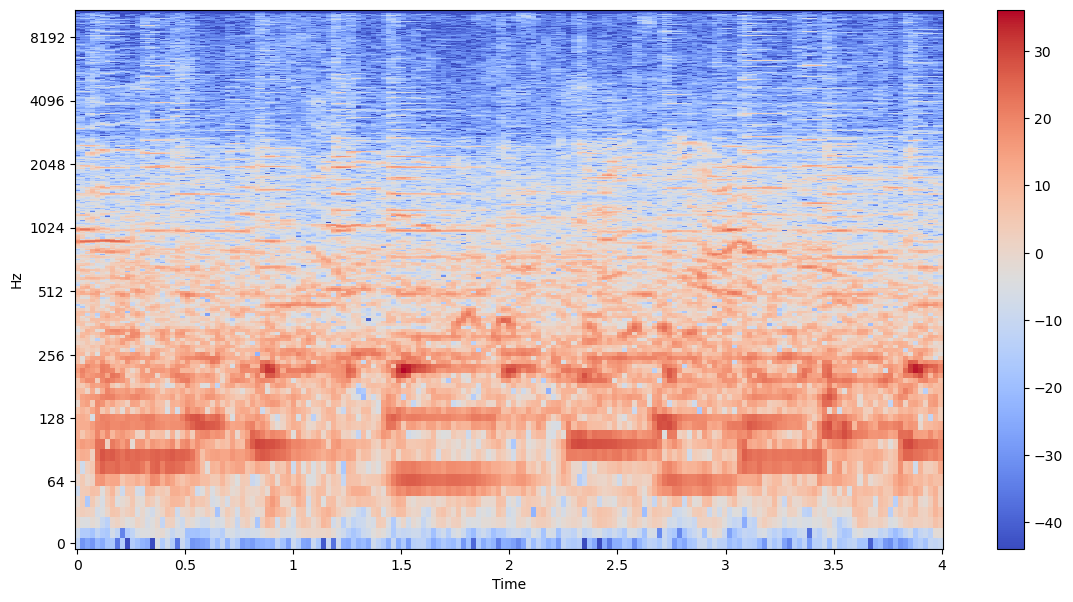

In [65]:
plt.figure(figsize = (14,7))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis = 'log')
plt.colorbar();

In [66]:
tempo, beat_frames = librosa.beat.beat_track(y = y, sr = sr)

In [67]:
tempo

161.4990234375

In [68]:
beat_frames

array([  5,  22,  38,  53,  69,  86, 102, 119, 135, 151])

### Feature Extraction

#### Zero Crossing Rate

Rate of the sign changes along the signal (when the wave crosses zero)

In [73]:
Audio('UrbanSound8K/audio/fold6/99710-9-0-6.wav')

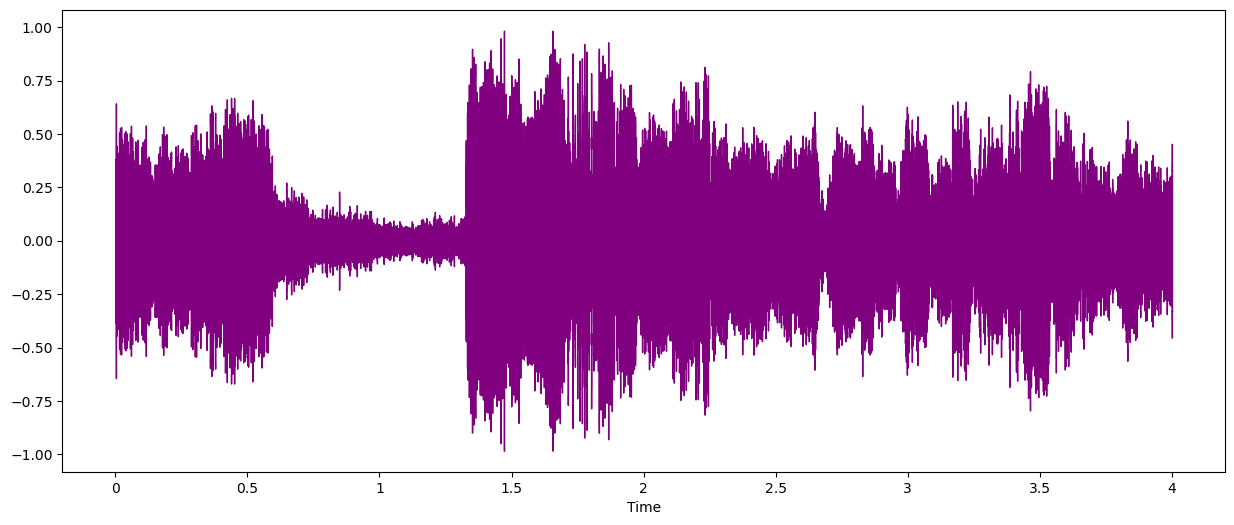

In [72]:
y, sr = librosa.load('/Users/eitan/Documents/Flatiron/Capstone/UrbanSound8K/audio/fold6/99710-9-0-6.wav')

plt.figure(figsize = (15,6))
librosa.display.waveshow(y, sr = sr, color = 'purple');

In [74]:
y.shape

(88200,)

Zooming in

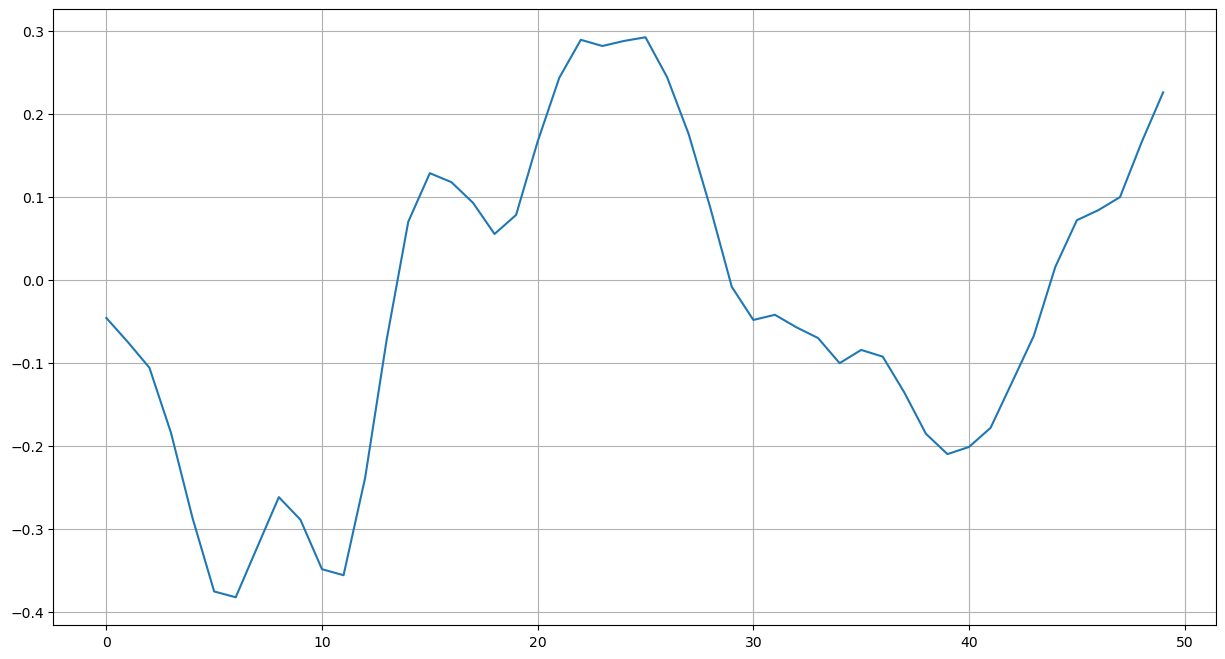

In [81]:
plt.figure(figsize = (15,8))
plt.plot(y[0:50])
plt.grid();

In [88]:
zero_crossings = librosa.zero_crossings(y[0:50], pad = False)
zero_crossings.sum()

3

In [89]:
zero_crossings = librosa.zero_crossings(y, pad = False)
zero_crossings.sum()

8127

### Specreal Centroid

In [90]:
from sklearn.preprocessing import minmax_scale

In [93]:
y, sr = librosa.load('/Users/eitan/Documents/Flatiron/Capstone/UrbanSound8K/audio/fold6/99710-9-0-6.wav')


In [97]:
all_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

In [98]:
all_centroids.shape

(173,)

In [99]:
frames = range(len(all_centroids))

In [100]:
t = librosa.frames_to_time(frames)

In [102]:
t.shape

(173,)

In [103]:
def normalize_spectrum(x, axis=0):
    return minmax_scale(x, axis = axis)

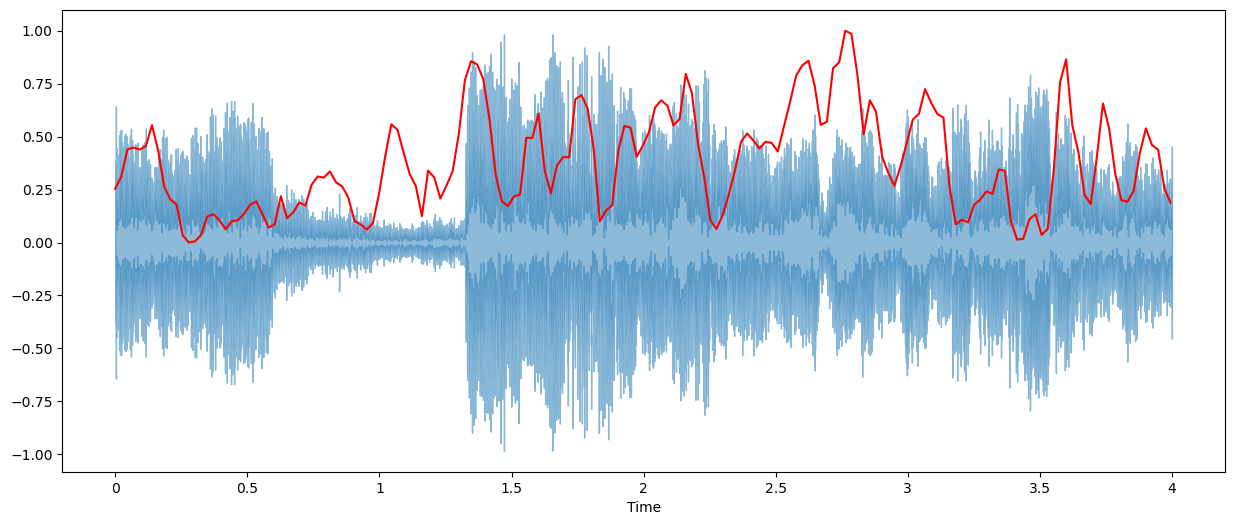

In [106]:
plt.figure(figsize = (15,6))
librosa.display.waveshow(y= y, sr = sr, alpha=0.5)
plt.plot(t, normalize_spectrum(all_centroids), color = 'r');